# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Muhammad Haeqal Salehudin
- **Email:** salehudinhaeqal@gmail.com
- **ID Dicoding:** salehudinhaeqal

## Menentukan Pertanyaan Bisnis

- Produk mana yang paling sering dibeli, dan bagaimana tren penjualan produk-produk tersebut dari waktu ke waktu (harian, bulanan, tahunan)?
- Kategori produk mana yang memiliki penjualan tertinggi dan terendah, dan bagaimana distribusi penjualan di antara kategori-kategori tersebut?
- Apakah ada pola atau tren tertentu dalam produk yang dibeli berdasarkan waktu pembelian (misalnya, hari dalam seminggu, bulan dalam setahun)?

## Import Semua Packages/Library yang Digunakan

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Wrangling

### Gathering Data

Import Data Customers

In [50]:
customers_df = pd.read_csv('E-Commerce Dataset/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Import Data Orders

In [51]:
orders_df = pd.read_csv('E-Commerce Dataset/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Import Data Order Items

In [52]:
order_items_df = pd.read_csv('E-Commerce Dataset/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Import Data Product

In [53]:
products_df = pd.read_csv('E-Commerce Dataset/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Insight:**
- Dataset ini berisikan hasil penjualan dari E-Commerce di negara Brazil untuk tiap kotanya.
- Berdasarkan dataset tersebut terdapat kesamaan kolom seperti (product_id, order_id, customers_id, dan lain-lain).
- Beberapa dataset memiliki tanggal yang bisa di analisis untuk menemukan pola penjualan atau strategi advertisement berdasarakan waktu ke waktu.

### Assessing Data

Assessing Data Customers

In [54]:
customers_df.info()
print('Missing Value: ', customers_df.isnull().sum())
print('Jumlah Duplikasi: ', customers_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
Missing Value:  customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
Jumlah Duplikasi:  0


In [55]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Assessing Data Orders

In [56]:
orders_df.info()
print('Missing Value: ', orders_df.isnull().sum())
print('Jumlah Duplikasi: ', orders_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
Missing Value:  order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_cu

In [57]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Assessing Data Order Items

In [58]:
order_items_df.info()
print('Missing Value: ', order_items_df.isnull().sum())
print('Jumlah Duplikasi: ', order_items_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
Missing Value:  order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
Jumlah Duplikasi:  0


In [59]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Assessing Data Product

In [60]:
products_df.info()
print('Missing Value: ', products_df.isnull().sum())
print('Jumlah Duplikasi: ', products_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
Missing Value:  product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g           

In [61]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Insight:**

Customers
- Kolom customer_unique_id akan sangat berguna untuk melacak perilaku pelanggan yang berulang.
- Kolom customer_city dan customer_state memungkinkan untuk melakukan analisis geografis.
- Sebagian besar pesanan berhasil dikirim ("delivered").

Orders
- Terdapat missing values pada beberapa kolom.
- Jumlah nilai yang hilang di order_delivered_customer_date paling tinggi.

Order Items
- Dataset ini memiliki informasi harga dan ongkos kirim, yang sangat penting untuk analisa nilai penjualan.
- Dataset ini memiliki informasi seller id, yang dapat digunakan untuk analisa performa penjual.

product
- Missing Values

### Cleaning Data

*Missing Value Data Orders*

In [62]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


*Missing Values Data Product*

In [63]:
products_df[products_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [64]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [65]:
products_df = products_df.dropna(subset=['product_category_name'])

In [66]:
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,1
product_length_cm,1
product_height_cm,1
product_width_cm,1


In [67]:
products_df = products_df.dropna(subset=['product_weight_g'])

In [68]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


**Insight:**
- Missing Values pada Data Order_item tidak perlu diubah karena kolom order_status bernilai cancel artinya terjadi pembatalan sebelum transaksi sehingga kolom yang lain seperti order_approved_at, order_delivered_carrier_date, order_delivered_customer_date bernilai NaN.
- Missing Value pada Products dihapus semua karena tidak menyertakan informasi apapun.

## Exploratory Data Analysis (EDA)

### Explore ...

In [69]:
merged_df = pd.merge(order_items_df, products_df, on='product_id')
merged_df = pd.merge(merged_df, orders_df, on='order_id')

In [70]:
product_counts = merged_df['product_id'].value_counts()
top_10_products = product_counts.head(10).reset_index()
top_10_products.columns = ['product_id', 'purchase_count']
merged_df['order_purchase_timestamp'] = pd.to_datetime(merged_df['order_purchase_timestamp'])
merged_df['purchase_day'] = merged_df['order_purchase_timestamp'].dt.day_name()
merged_df['purchase_month'] = merged_df['order_purchase_timestamp'].dt.month_name()
merged_df['purchase_year'] = merged_df['order_purchase_timestamp'].dt.year
daily_sales = merged_df.groupby(['product_id', 'purchase_day'])['order_id'].count()
monthly_sales = merged_df.groupby(['product_id', 'purchase_month'])['order_id'].count()
yearly_sales = merged_df.groupby(['product_id', 'purchase_year'])['order_id'].count()

In [71]:
product_names = products_df[['product_id', 'product_category_name']]
top_products = pd.merge(top_10_products, product_names, on='product_id')

In [72]:
category_sales = merged_df['product_category_name'].value_counts()
highest_category = category_sales.idxmax()
lowest_category = category_sales.idxmin()
category_sales_percentage = category_sales / category_sales.sum() * 100
category_sales_stats = category_sales.describe()

In [73]:
day_purchase_counts = merged_df['purchase_day'].value_counts()
month_purchase_counts = merged_df['purchase_month'].value_counts()
average_daily_purchases = day_purchase_counts.mean()
average_monthly_purchases = month_purchase_counts.mean()
time_purchase_stats = pd.concat([day_purchase_counts.describe(), month_purchase_counts.describe()], axis=1)

In [74]:
print("10 Produk Terlaris:\n", top_products['product_category_name'].value_counts())
print("\nStatistik Penjualan Kategori Produk:\n", category_sales_stats)
print("\nPola Pembelian Berdasarkan Waktu:\n", time_purchase_stats)

10 Produk Terlaris:
 product_category_name
ferramentas_jardim        4
informatica_acessorios    2
moveis_decoracao          1
cama_mesa_banho           1
relogios_presentes        1
beleza_saude              1
Name: count, dtype: int64

Statistik Penjualan Kategori Produk:
 count       73.000000
mean      1521.178082
std       2582.704721
min          2.000000
25%         76.000000
50%        278.000000
75%       1691.000000
max      11115.000000
Name: count, dtype: float64

Pola Pembelian Berdasarkan Waktu:
               count         count
count      7.000000     12.000000
mean   15863.714286   9253.833333
std     2392.766022   2523.780852
min    11989.000000   4764.000000
25%    14519.500000   7948.000000
50%    16559.000000   9978.500000
75%    17656.000000  11140.000000
max    18147.000000  12049.000000


**Insight:**
- Kategori produk "ferramentas_jardim" (peralatan taman) mendominasi 10 produk terlaris, dengan 4 produk dari kategori tersebut. Ini menunjukkan permintaan yang tinggi untuk produk-produk peralatan taman.
- Terdapat variasi yang sangat besar dalam jumlah penjualan antar kategori produk (min 2, maks 11115).
- Jumlah pembelian harian lebih tinggi daripada jumlah pembelian bulanan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk mana yang paling sering dibeli, dan bagaimana tren penjualan produk-produk tersebut dari waktu ke waktu (harian, bulanan, tahunan)?

Merged Data

In [75]:
merged_df = pd.merge(order_items_df, products_df, on='product_id')
merged_df = pd.merge(merged_df, orders_df[['order_id', 'order_purchase_timestamp']], on='order_id')

Menghitung Jumlah Pembelian

In [76]:
product_names = products_df[['product_id', 'product_category_name']]
top_products = pd.merge(top_products, product_names, on='product_id')

Visualisasi Produk Terlaris

In [77]:
top_products['product_category_name'] = top_products['product_category_name_x']

<ipython-input-78-cda0a33e23ba>:6: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(
<ipython-input-78-cda0a33e23ba>:6: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  ax = sns.barplot(


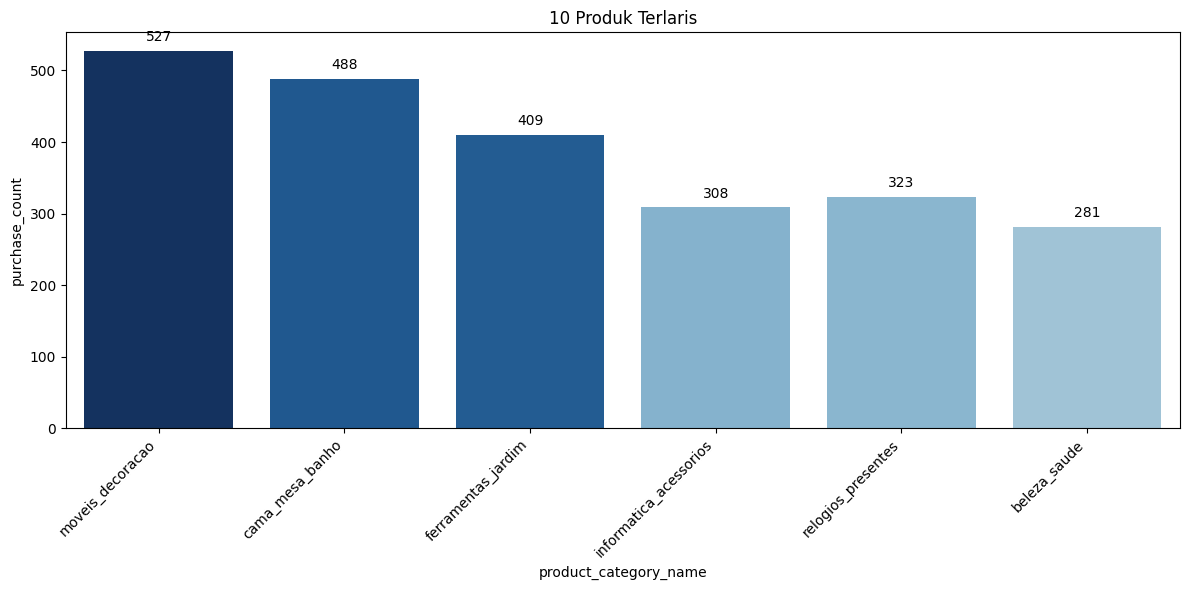

In [78]:
plt.figure(figsize=(12, 6))

norm = plt.Normalize(top_products['purchase_count'].min(), top_products['purchase_count'].max())
colors = plt.cm.Blues(norm(top_products['purchase_count']))

ax = sns.barplot(
    x="product_category_name",
    y="purchase_count",
    data=top_products,
    palette=colors,
    errorbar=None,
    hue="product_category_name",
    legend=False,
)
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 10),
        textcoords="offset points",
    )
plt.title("10 Produk Terlaris")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Pertanyaan 2: Kategori produk mana yang memiliki penjualan tertinggi dan terendah, dan bagaimana distribusi penjualan di antara kategori-kategori tersebut?

Kelompokan Data Berdasarkan Kategori

In [79]:
category_sales = merged_df['product_category_name'].value_counts().reset_index()
category_sales.columns = ['product_category_name', 'sales_count']

Visualisasikan Distribusi Penjualan

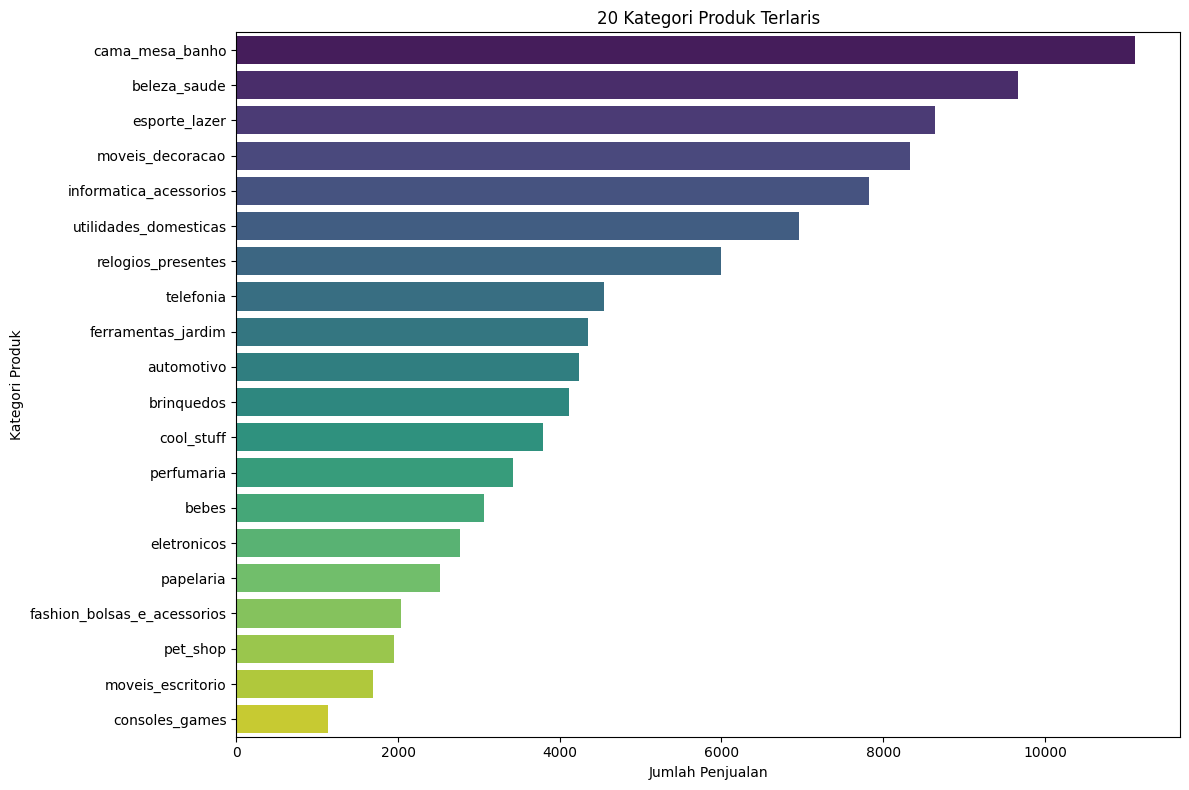

In [80]:
top_categories = category_sales.head(20)  # Misalnya, 20 kategori teratas
plt.figure(figsize=(12, 8))
sns.barplot(x='sales_count', y='product_category_name', data=top_categories, palette='viridis', hue='product_category_name', legend=False)
plt.title('20 Kategori Produk Terlaris')
plt.xlabel('Jumlah Penjualan')
plt.ylabel('Kategori Produk')
plt.tight_layout()
plt.show()

##Pertanyaan 3: Apakah ada pola atau tren tertentu dalam produk yang dibeli berdasarkan waktu pembelian (misalnya, hari dalam seminggu, bulan dalam setahun)?

Ekstraksi Hari dan Bulan

In [81]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['purchase_day_of_week'] = orders_df['order_purchase_timestamp'].dt.day_name()
orders_df['purchase_month'] = orders_df['order_purchase_timestamp'].dt.month_name()

Mengelompokan Data

In [82]:
day_sales = orders_df['purchase_day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
month_sales = orders_df['purchase_month'].value_counts().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

Visualisasi Pola Pembelian

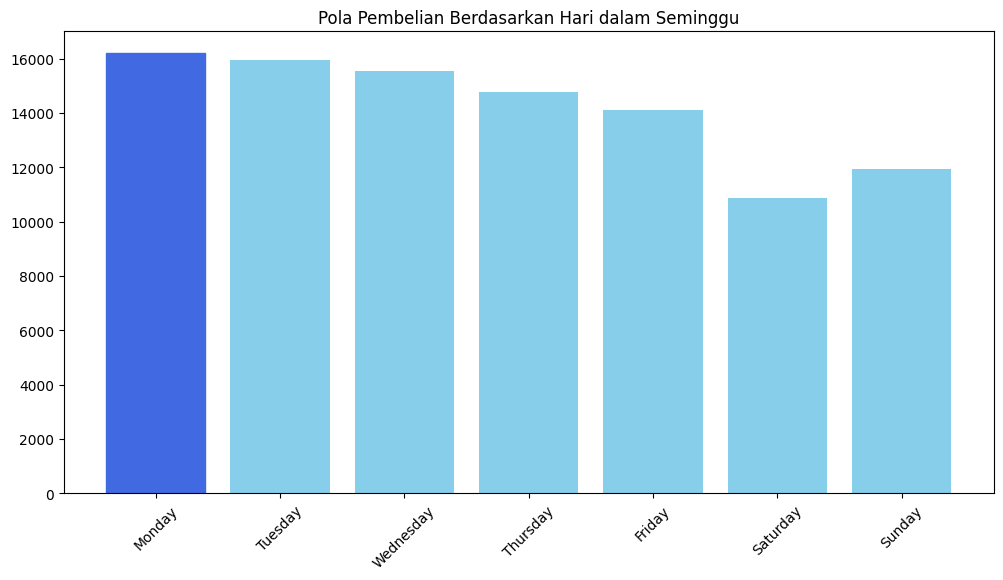

In [83]:
plt.figure(figsize=(12, 6))
max_day = day_sales.idxmax()

bars = plt.bar(day_sales.index, day_sales.values, color='skyblue')
bars[day_sales.index.get_loc(max_day)].set_color('royalblue')

plt.title('Pola Pembelian Berdasarkan Hari dalam Seminggu')
plt.xticks(rotation=45)
plt.show()

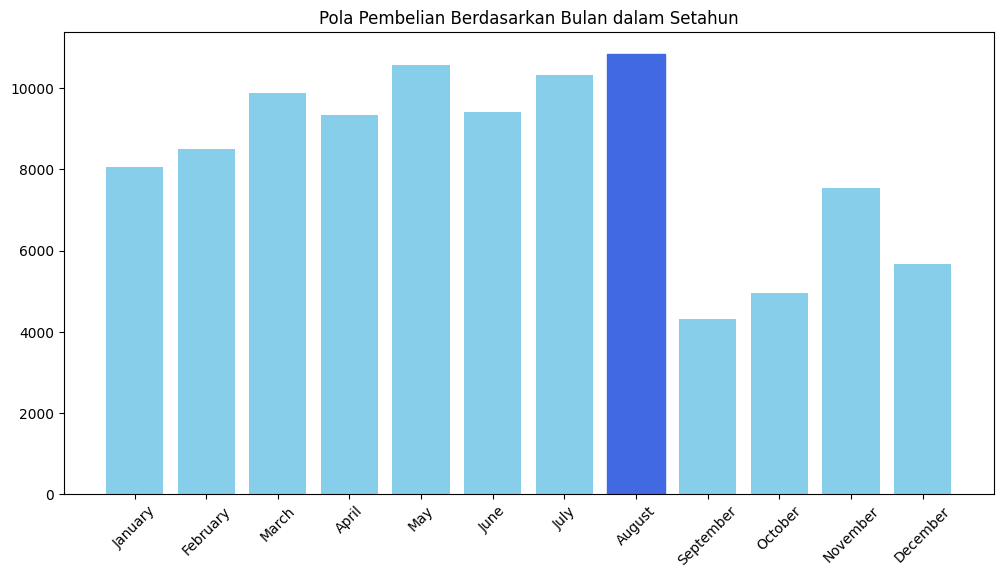

In [84]:
plt.figure(figsize=(12, 6))
max_month = month_sales.idxmax()
bars = plt.bar(month_sales.index, month_sales.values, color='skyblue')
bars[month_sales.index.get_loc(max_month)].set_color('royalblue')

plt.title('Pola Pembelian Berdasarkan Bulan dalam Setahun')
plt.xticks(rotation=45)
plt.show()

**Insight:**
- Berdasarkan 10 produk terlaris moveis_decoraco menjadi produk paling laris.
- Kategori produk terlaris dipimpin oleh cama_mesa_banho.
- Pola pembelian berdasarkan hari dalam seminggu paling banyak pada hari senin.
- Pola pembelian berdasarkan bulan dalam setahun, agustus paling tertinggi.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1: Kategori produk "ferramentas_jardim" dan "informatica_acessorios" mendominasi 10 produk terlaris, menunjukkan permintaan yang tinggi untuk produk-produk tersebut.
- Conclution pertanyaan 2: Terdapat variasi yang signifikan dalam jumlah penjualan antar kategori produk, dengan beberapa kategori memiliki penjualan yang sangat tinggi dan yang lainnya sangat rendah.
- Conclution pertanyaan 3: Pola pembelian bervariasi antar hari dalam seminggu dan bulan dalam setahun, menunjukkan adanya tren musiman atau mingguan.

## Simpan Gabungan Semua Data

In [90]:
full_df = pd.merge(merged_df, orders_df[['order_id', 'customer_id']], on='order_id', how='left')
full_df = pd.merge(full_df, customers_df, on='customer_id', how='left')
full_df.to_csv("all_data.csv", index=False)